
MODEL 1: HIGH REFUSE RISK PREDICTION

DATASET: models_data.csv
Shape: (2714, 10)

Target Distribution (high_refuse_flag):
0    2006
1     708
Name: high_refuse_flag, dtype: int64

Missing Values:
Series([], dtype: int64)

Analyzing feature correlations...


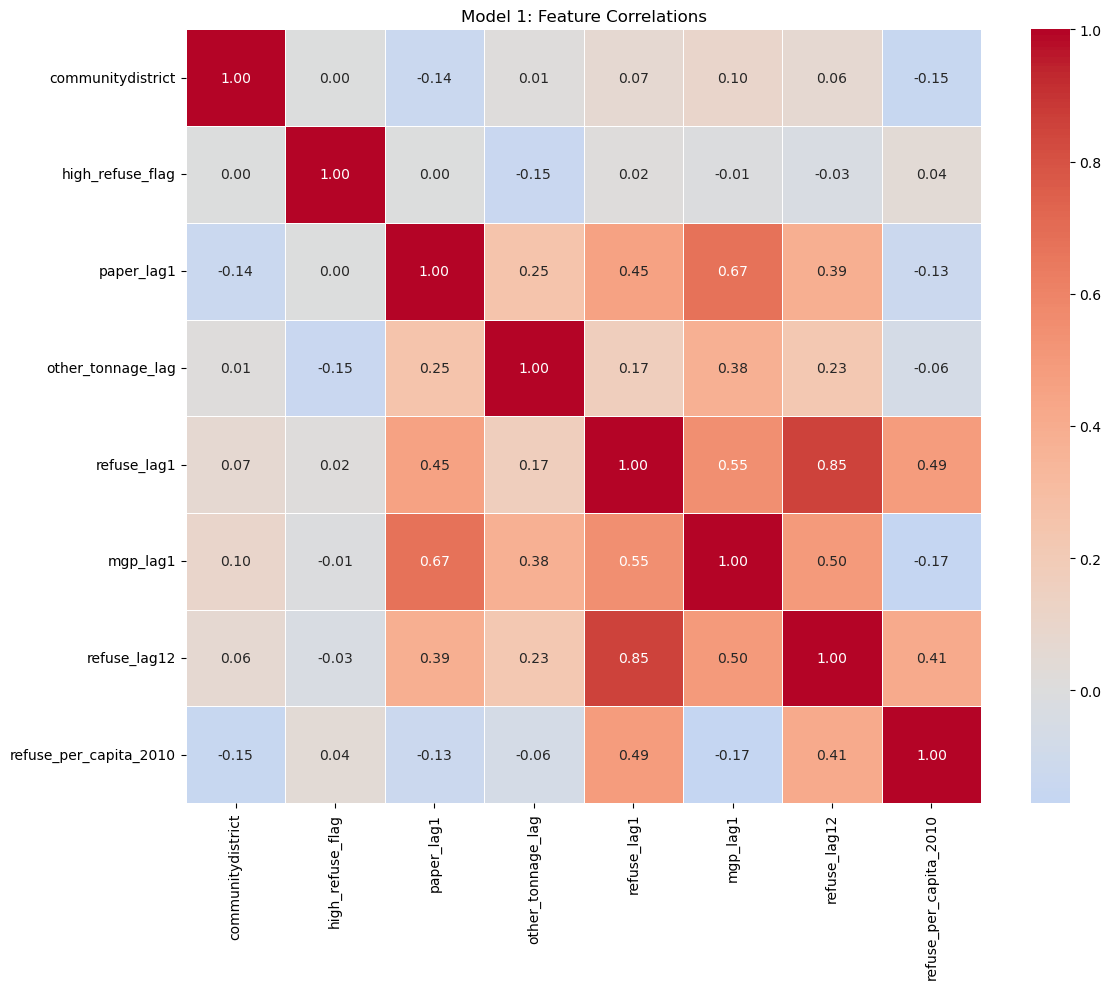


TIME-BASED TRAIN/TEST SPLIT
Training set size: 2,360
Test set size: 354
Training period: 2022-01 to 2025-04
Test period: 2025-05 to 2025-10

Building Model 1 pipeline...
Training Model 1...

OPTIMAL THRESHOLD (F1-MAXIMIZING)
Optimal threshold: 0.225
Precision: 0.241
Recall:    0.897
F1-Score:  0.380

MODEL 1: HIGH REFUSE RISK - EVALUATION METRICS
Threshold: 0.22
Accuracy:  0.517 (51.7%)
Precision: 0.237 (23.7%)
Recall:    0.879 (87.9%)
F1-Score:  0.374
ROC-AUC:   0.659

Confusion Matrix:
[[132 164]
 [  7  51]]

Classification Report:
              precision    recall  f1-score   support

           0      0.950     0.446     0.607       296
           1      0.237     0.879     0.374        58

    accuracy                          0.517       354
   macro avg      0.593     0.663     0.490       354
weighted avg      0.833     0.517     0.569       354



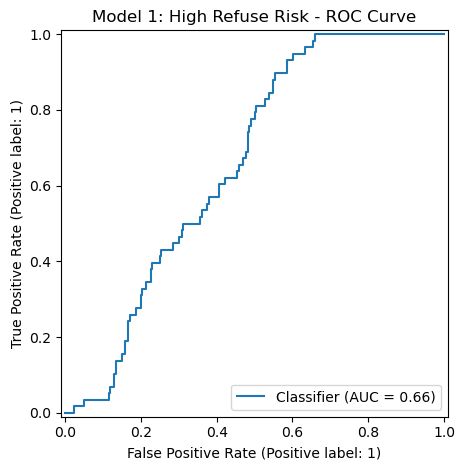


Saving Model 1...
✓ Saved: waste_risk_model.pkl
✓ Saved: model_config.json

MODEL 2: RECYCLING PERFORMANCE PREDICTION

DATASET: model_2_data.csv
Shape: (2714, 13)

Target Distribution (high_recycling):
0    2011
1     703
Name: high_recycling, dtype: int64

Missing Values:
Series([], dtype: int64)

Analyzing feature correlations...


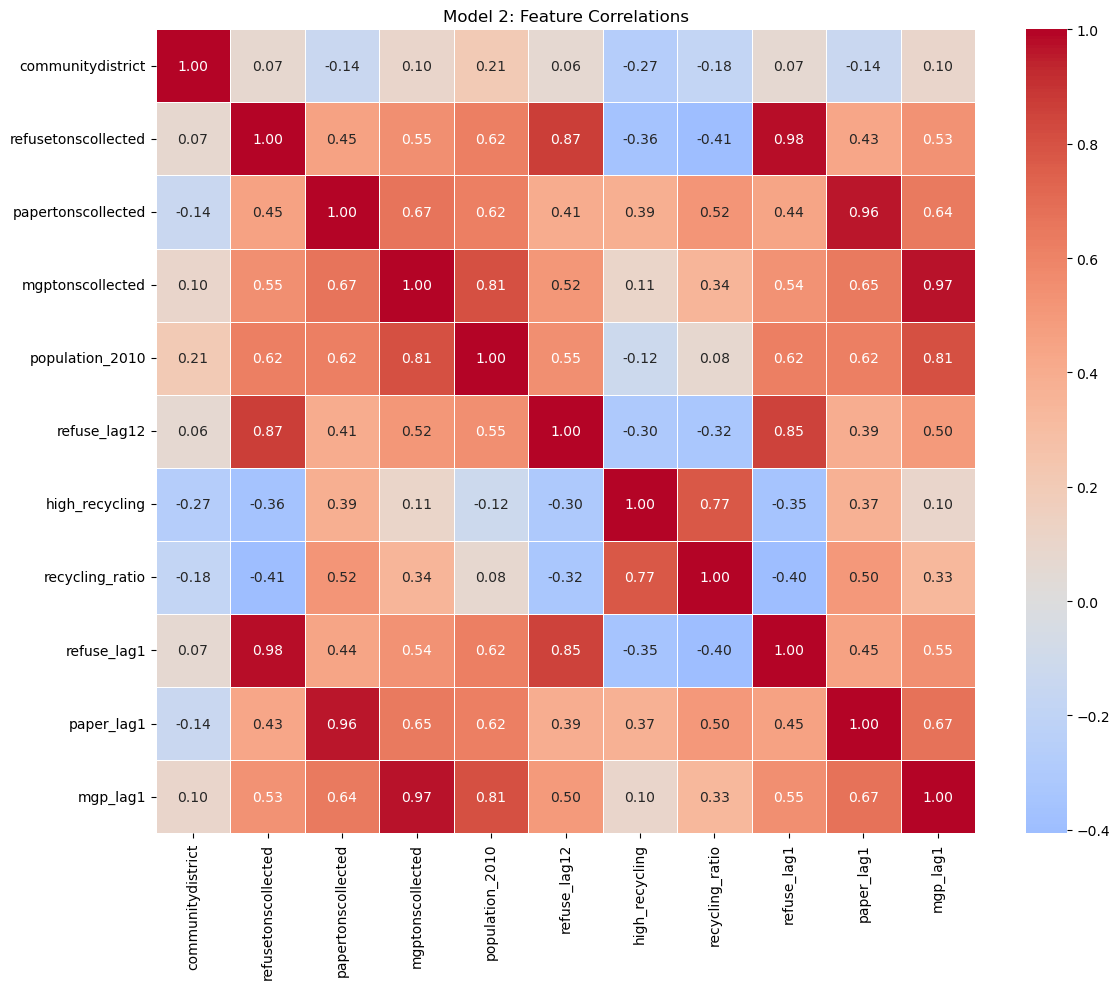


TIME-BASED TRAIN/TEST SPLIT
Training set size: 2,360
Test set size: 354
Training period: 2022-01 to 2025-04
Test period: 2025-05 to 2025-10

Building Model 2 pipeline...
Training Model 2...

OPTIMAL THRESHOLD (F1-MAXIMIZING)
Optimal threshold: 0.857
Precision: 0.942
Recall:    0.880
F1-Score:  0.910

BUSINESS THRESHOLD ADJUSTMENT
Optimal F1 threshold: 0.857
Business threshold:   0.60 (prioritize recall)

--- Evaluation with Optimal Threshold ---

MODEL 2: RECYCLING PERFORMANCE (OPTIMAL) - EVALUATION METRICS
Threshold: 0.86
Accuracy:  0.952 (95.2%)
Precision: 0.941 (94.1%)
Recall:    0.870 (87.0%)
F1-Score:  0.904
ROC-AUC:   0.987

Confusion Matrix:
[[257   5]
 [ 12  80]]

Classification Report:
              precision    recall  f1-score   support

           0      0.955     0.981     0.968       262
           1      0.941     0.870     0.904        92

    accuracy                          0.952       354
   macro avg      0.948     0.925     0.936       354
weighted avg      0.952

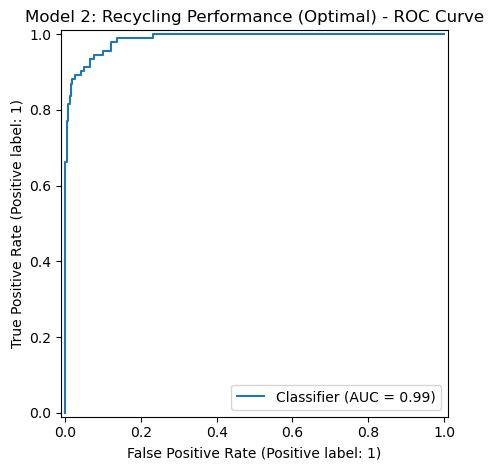


--- Evaluation with Business Threshold (0.60) ---

MODEL 2: RECYCLING PERFORMANCE (BUSINESS) - EVALUATION METRICS
Threshold: 0.60
Accuracy:  0.932 (93.2%)
Precision: 0.827 (82.7%)
Recall:    0.935 (93.5%)
F1-Score:  0.878
ROC-AUC:   0.987

Confusion Matrix:
[[244  18]
 [  6  86]]

Classification Report:
              precision    recall  f1-score   support

           0      0.976     0.931     0.953       262
           1      0.827     0.935     0.878        92

    accuracy                          0.932       354
   macro avg      0.901     0.933     0.915       354
weighted avg      0.937     0.932     0.933       354



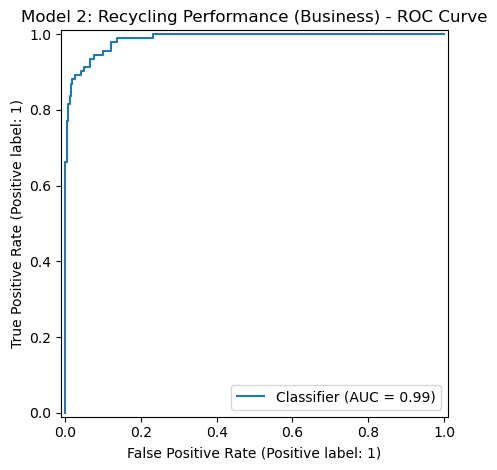


Saving Model 2...
✓ Saved: recycling_performance.pkl
✓ Saved: model_config_2.json

RELIABILITY DIAGNOSTICS - RECYCLING PERFORMANCE MODEL

------------------------------------------------------------
CHECK 1: PERFORMANCE OVER TIME (Concept Drift)
------------------------------------------------------------

Monthly Performance Breakdown:
  month  n_samples  accuracy       f1  roc_auc
2025-05         59  0.915254 0.871795 0.983709
2025-06         59  0.881356 0.787879 0.996656
2025-07         59  0.949153 0.909091 0.994186
2025-08         59  0.898305 0.812500 1.000000
2025-09         59  0.966102 0.928571 1.000000
2025-10         59  0.983051 0.967742 0.994186

F1 Change (first→last): +0.096 → ✅ STABLE


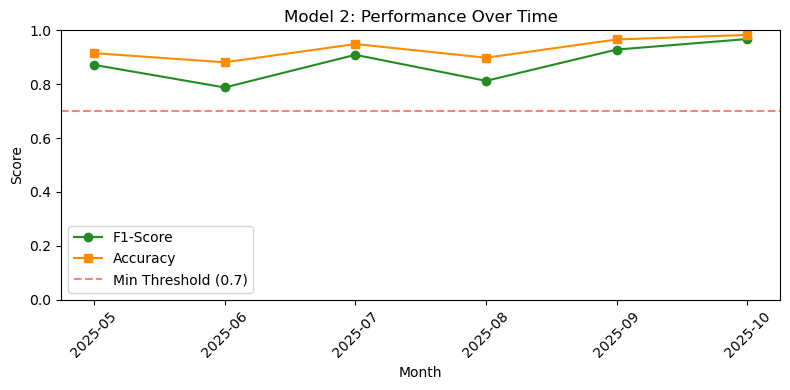


------------------------------------------------------------
CHECK 2: FEATURE DRIFT (Numeric Stability)
------------------------------------------------------------

Feature Distribution Comparison (Train vs Test):
        feature    train_mean     test_mean  mean_shift_z  std_ratio status
    refuse_lag1   4166.614110   4166.995480      0.000239   0.978603   ✅ OK
     paper_lag1    421.340975    423.998023      0.013485   0.983666   ✅ OK
       mgp_lag1    406.501356    415.286723      0.051626   1.063811   ✅ OK
population_2010 138503.050847 138503.050847      0.000000   1.001203   ✅ OK
   refuse_lag12   4176.890039   4343.440395      0.120978   1.185758   ✅ OK

→ Features with drift: 0/5

------------------------------------------------------------
CHECK 3: CALIBRATION (Confidence Reliability)
------------------------------------------------------------
Brier Score: 0.0537 ✅ GOOD
  (Lower is better; <0.25 indicates good calibration)


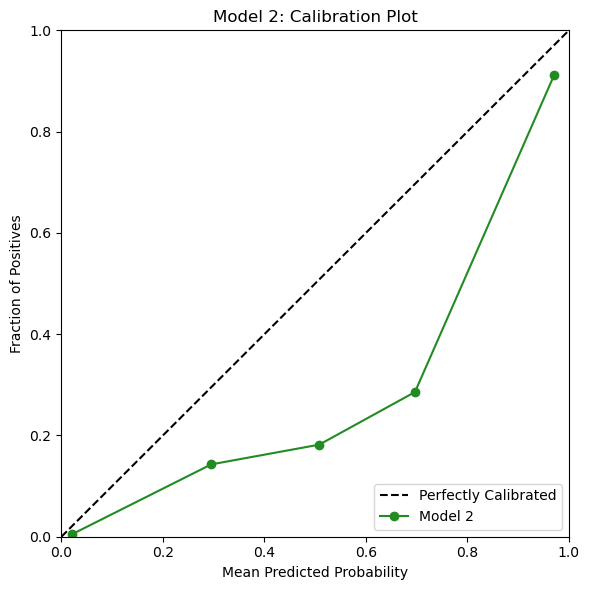


Calibration Breakdown:
Predicted Prob Actual Rate  Gap
          0.02        0.00 0.02
          0.30        0.14 0.15
          0.51        0.18 0.33
          0.70        0.29 0.41
          0.97        0.91 0.06

Average Calibration Gap: 0.193 ⚠️ NEEDS RECALIBRATION

RELIABILITY SUMMARY - MODEL 2
✅ Performance Stability: PASSED
✅ Feature Drift: PASSED
⚠️ Calibration: REVIEW NEEDED

→ Overall: 2/3 checks passed

MODELING COMPLETE - SUMMARY

MODEL 1: HIGH REFUSE RISK
  Target: high_refuse_flag
  Features: 8 (5 numeric, 3 categorical)
  Threshold: 0.225
  Accuracy: 0.517
  F1-Score: 0.374
  Reliability: 1/3 checks passed
  Output: waste_risk_model.pkl

MODEL 2: RECYCLING PERFORMANCE
  Target: high_recycling
  Features: 8 (5 numeric, 3 categorical)
  Optimal Threshold: 0.857 (F1: 0.904)
  Business Threshold: 0.60
    └─ Accuracy:  0.932 (93.2%)
    └─ Precision: 0.827 (82.7%)
    └─ Recall:    0.935 (93.5%)
    └─ F1-Score:  0.878
  Output: recycling_performance.pkl



In [7]:
# =====================================================
# NYC WASTE MODELING - DUAL TARGET PREDICTION
# =====================================================
# This notebook trains two logistic regression models:
# 1. High Refuse Risk Model (waste_risk_model.pkl)
# 2. Recycling Performance Model (recycling_performance.pkl)

# =============================================================================
# 1. SETUP & IMPORTS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
    classification_report, RocCurveDisplay, precision_recall_curve,
    precision_score, recall_score, brier_score_loss
)
from sklearn.calibration import calibration_curve

# =============================================================================
# 2. DATA LOADING & EXPLORATION
# =============================================================================

def load_and_explore(path, target_col):
    """Load dataset and perform initial exploration"""
    df = pd.read_csv(path)
    
    # Drop unnamed index column if exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    
    print(f"\n{'='*60}")
    print(f"DATASET: {path.split('/')[-1]}")
    print(f"{'='*60}")
    print(f"Shape: {df.shape}")
    print(f"\nTarget Distribution ({target_col}):")
    print(df[target_col].value_counts())
    print(f"\nMissing Values:")
    print(df.isna().sum()[df.isna().sum() > 0])
    
    return df

def plot_correlation_matrix(df, title="Feature Correlations"):
    """Plot correlation heatmap for numerical features"""
    numerical_cols = df.select_dtypes(include=[np.number])
    correlation_matrix = numerical_cols.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                center=0, fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# =============================================================================
# 3. DATA PREPARATION UTILITIES
# =============================================================================

def prepare_features(df, target_col, feature_cols):
    """
    Prepare features and target for modeling
    
    Parameters:
    -----------
    df : DataFrame
        Input dataset
    target_col : str
        Name of target column
    feature_cols : list
        List of feature column names
    
    Returns:
    --------
    X : DataFrame
        Feature matrix
    y : Series
        Target vector
    """
    # Extract target and features
    y = df[target_col].astype('int')
    X = df[feature_cols].copy()
    
    # Drop rows with missing values
    X = X.dropna()
    y = y.loc[X.index]
    
    # Format categorical columns
    X['month'] = X['month'].astype(str)
    X['borough'] = X['borough'].astype(str).str.strip().str.title()
    X['communitydistrict'] = X['communitydistrict'].astype(str)
    
    return X, y

def time_based_split(X, y, test_months=6):
    """
    Split data using time-aware approach (last N months for testing)
    
    Parameters:
    -----------
    X : DataFrame
        Feature matrix
    y : Series
        Target vector
    test_months : int
        Number of recent months to hold out for testing
    
    Returns:
    --------
    X_train, X_test, y_train, y_test : train/test splits
    """
    unique_months = sorted(X['month'].unique())
    test_month_list = unique_months[-test_months:]
    
    test_mask = X['month'].isin(test_month_list)
    X_train = X[~test_mask]
    X_test = X[test_mask]
    y_train = y[~test_mask]
    y_test = y[test_mask]
    
    print(f"\n{'='*60}")
    print("TIME-BASED TRAIN/TEST SPLIT")
    print(f"{'='*60}")
    print(f"Training set size: {len(X_train):,}")
    print(f"Test set size: {len(X_test):,}")
    print(f"Training period: {X_train['month'].min()} to {X_train['month'].max()}")
    print(f"Test period: {X_test['month'].min()} to {X_test['month'].max()}")
    
    return X_train, X_test, y_train, y_test

# =============================================================================
# 4. MODEL BUILDING UTILITIES
# =============================================================================

def build_pipeline(categorical_cols, numeric_cols, model_params=None):
    """
    Build preprocessing + modeling pipeline
    
    Parameters:
    -----------
    categorical_cols : list
        Categorical feature names
    numeric_cols : list
        Numerical feature names
    model_params : dict or None
        Parameters for LogisticRegression. If None, uses defaults with L2 regularization
    
    Returns:
    --------
    Pipeline object
    """
    # Preprocessing
    preprocess = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
            ('num', StandardScaler(), numeric_cols)
        ],
        remainder='drop'
    )
    
    # Default model parameters
    if model_params is None:
        model_params = {
            'penalty': 'l2',
            'C': 1.0,
            'class_weight': 'balanced',
            'max_iter': 1000,
            'random_state': 42
        }
    
    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', LogisticRegression(**model_params))
    ])
    
    return pipeline

def evaluate_model(pipeline, X_test, y_test, model_name, threshold=0.5):
    """
    Evaluate model and display comprehensive metrics
    
    Parameters:
    -----------
    pipeline : fitted Pipeline
        Trained model pipeline
    X_test : DataFrame
        Test features
    y_test : Series
        Test target
    model_name : str
        Name for display
    threshold : float
        Classification threshold (default 0.5)
    
    Returns:
    --------
    dict : Dictionary of metrics
    """
    # Predictions
    y_pred = (pipeline.predict_proba(X_test)[:, 1] > threshold).astype(int)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Display results
    print(f"\n{'='*60}")
    print(f"{model_name.upper()} - EVALUATION METRICS")
    print(f"{'='*60}")
    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy:  {acc:.3f} ({acc*100:.1f}%)")
    print(f"Precision: {precision:.3f} ({precision*100:.1f}%)")
    print(f"Recall:    {recall:.3f} ({recall*100:.1f}%)")
    print(f"F1-Score:  {f1:.3f}")
    print(f"ROC-AUC:   {roc:.3f}")
    print(f"\nConfusion Matrix:")
    print(cm)
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    
    # ROC curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f'{model_name} - ROC Curve')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc,
        'threshold': threshold,
        'confusion_matrix': cm
    }

def find_optimal_threshold(y_test, y_proba):
    """
    Find threshold that maximizes F1 score
    
    Returns:
    --------
    dict : optimal_threshold, precision, recall at that threshold
    """
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-10)
    optimal_idx = np.argmax(f1_scores[:-1])  # Exclude last element
    optimal_threshold = thresholds[optimal_idx]
    
    print(f"\n{'='*60}")
    print("OPTIMAL THRESHOLD (F1-MAXIMIZING)")
    print(f"{'='*60}")
    print(f"Optimal threshold: {optimal_threshold:.3f}")
    print(f"Precision: {precision[optimal_idx]:.3f}")
    print(f"Recall:    {recall[optimal_idx]:.3f}")
    print(f"F1-Score:  {f1_scores[optimal_idx]:.3f}")
    
    return {
        'threshold': optimal_threshold,
        'precision': precision[optimal_idx],
        'recall': recall[optimal_idx],
        'f1': f1_scores[optimal_idx]
    }

# =============================================================================
# 5. MODEL 1: HIGH REFUSE RISK PREDICTION
# =============================================================================

print("\n" + "="*80)
print("MODEL 1: HIGH REFUSE RISK PREDICTION")
print("="*80)

# Load data
path_refuse = '/Users/Marcy_Student/Desktop/marcy/Modeling NYC-waste/Notebook/models_data.csv'
df_refuse = load_and_explore(path_refuse, 'high_refuse_flag')

# Correlation analysis
print("\nAnalyzing feature correlations...")
corr_matrix_refuse = plot_correlation_matrix(df_refuse, "Model 1: Feature Correlations")

# Define features
refuse_features = [
    'month', 'borough', 'communitydistrict',
    'paper_lag1', 'other_tonnage_lag', 'refuse_lag1',
    'mgp_lag1', 'refuse_lag12'
]

refuse_categorical = ['month', 'borough', 'communitydistrict']
refuse_numeric = ['paper_lag1', 'other_tonnage_lag', 'refuse_lag1', 
                  'mgp_lag1', 'refuse_lag12']

# Prepare data
X_refuse, y_refuse = prepare_features(df_refuse, 'high_refuse_flag', refuse_features)

# Train/test split
X_refuse_train, X_refuse_test, y_refuse_train, y_refuse_test = time_based_split(
    X_refuse, y_refuse, test_months=6
)

# Build and train model
print("\nBuilding Model 1 pipeline...")
refuse_model = build_pipeline(refuse_categorical, refuse_numeric)
print("Training Model 1...")
refuse_model.fit(X_refuse_train, y_refuse_train)

# Find optimal threshold
y_refuse_proba = refuse_model.predict_proba(X_refuse_test)[:, 1]
refuse_optimal = find_optimal_threshold(y_refuse_test, y_refuse_proba)

# Evaluate with optimal threshold
refuse_metrics = evaluate_model(
    refuse_model, X_refuse_test, y_refuse_test,
    model_name="Model 1: High Refuse Risk",
    threshold=refuse_optimal['threshold']
)

# Save model
print("\nSaving Model 1...")
joblib.dump(refuse_model, 'waste_risk_model.pkl')
with open('model_config.json', 'w') as f:
    json.dump({'optimal_threshold': float(refuse_optimal['threshold'])}, f)
print("✓ Saved: waste_risk_model.pkl")
print("✓ Saved: model_config.json")


# =============================================================================
# 6. MODEL 2: RECYCLING PERFORMANCE PREDICTION
# =============================================================================

print("\n" + "="*80)
print("MODEL 2: RECYCLING PERFORMANCE PREDICTION")
print("="*80)

# Load data
path_recycling = '/Users/Marcy_Student/Desktop/marcy/Modeling NYC-waste/Notebook/model_2_data.csv'
df_recycling = load_and_explore(path_recycling, 'high_recycling')

# Correlation analysis
print("\nAnalyzing feature correlations...")
corr_matrix_recycling = plot_correlation_matrix(df_recycling, "Model 2: Feature Correlations")

# Define features
recycling_features = [
    'month', 'borough', 'communitydistrict',
    'refuse_lag1', 'paper_lag1', 'mgp_lag1',
    'population_2010', 'refuse_lag12'
]

recycling_categorical = ['month', 'borough', 'communitydistrict']
recycling_numeric = ['refuse_lag1', 'paper_lag1', 'mgp_lag1',
                     'population_2010', 'refuse_lag12']

# Prepare data
X_recycling, y_recycling = prepare_features(
    df_recycling, 'high_recycling', recycling_features
)

# Train/test split
X_recycling_train, X_recycling_test, y_recycling_train, y_recycling_test = time_based_split(
    X_recycling, y_recycling, test_months=6
)

# Build and train model
print("\nBuilding Model 2 pipeline...")
recycling_model = build_pipeline(recycling_categorical, recycling_numeric)
print("Training Model 2...")
recycling_model.fit(X_recycling_train, y_recycling_train)

# Find optimal threshold
y_recycling_proba = recycling_model.predict_proba(X_recycling_test)[:, 1]
recycling_optimal = find_optimal_threshold(y_recycling_test, y_recycling_proba)

# Business decision: Use 0.60 threshold for higher recall
BUSINESS_THRESHOLD = 0.60
print(f"\n{'='*60}")
print("BUSINESS THRESHOLD ADJUSTMENT")
print(f"{'='*60}")
print(f"Optimal F1 threshold: {recycling_optimal['threshold']:.3f}")
print(f"Business threshold:   {BUSINESS_THRESHOLD:.2f} (prioritize recall)")

# Evaluate with optimal threshold
print("\n--- Evaluation with Optimal Threshold ---")
recycling_metrics_optimal = evaluate_model(
    recycling_model, X_recycling_test, y_recycling_test,
    model_name="Model 2: Recycling Performance (Optimal)",
    threshold=recycling_optimal['threshold']
)

# Evaluate with business threshold
print("\n--- Evaluation with Business Threshold (0.60) ---")
recycling_metrics_business = evaluate_model(
    recycling_model, X_recycling_test, y_recycling_test,
    model_name="Model 2: Recycling Performance (Business)",
    threshold=BUSINESS_THRESHOLD
)

# Save model
print("\nSaving Model 2...")
joblib.dump(recycling_model, 'recycling_performance.pkl')
with open('model_config_2.json', 'w') as f:
    json.dump({
        'optimal_threshold': float(recycling_optimal['threshold']),
        'business_threshold': BUSINESS_THRESHOLD,
        'metrics_at_business_threshold': {
            'accuracy': float(recycling_metrics_business['accuracy']),
            'precision': float(recycling_metrics_business['precision']),
            'recall': float(recycling_metrics_business['recall']),
            'f1': float(recycling_metrics_business['f1'])
        }
    }, f, indent=2)
print("✓ Saved: recycling_performance.pkl")
print("✓ Saved: model_config_2.json")
# =============================================================================
# 6.1 RELIABILITY DIAGNOSTICS - MODEL 2
# =============================================================================

print("\n" + "="*80)
print("RELIABILITY DIAGNOSTICS - RECYCLING PERFORMANCE MODEL")
print("="*80)

# -----------------------------------------------------------------------------
# CHECK 1: Performance Over Time (Concept Drift Simulation)
# -----------------------------------------------------------------------------
print("\n" + "-"*60)
print("CHECK 1: PERFORMANCE OVER TIME (Concept Drift)")
print("-"*60)

test_months_sorted_r = sorted(X_recycling_test['month'].unique())
monthly_metrics_r = []

for month in test_months_sorted_r:
    mask = X_recycling_test['month'] == month
    X_month = X_recycling_test[mask]
    y_month = y_recycling_test[mask]
    
    if len(y_month) > 10 and y_month.nunique() > 1:  # Need enough samples
        proba = recycling_model.predict_proba(X_month)[:, 1]
        pred = (proba > BUSINESS_THRESHOLD).astype(int)  # Use business threshold
        
        monthly_metrics_r.append({
            'month': month,
            'n_samples': len(y_month),
            'accuracy': accuracy_score(y_month, pred),
            'f1': f1_score(y_month, pred, zero_division=0),
            'roc_auc': roc_auc_score(y_month, proba) if y_month.nunique() > 1 else np.nan
        })

drift_df_r = pd.DataFrame(monthly_metrics_r)
print("\nMonthly Performance Breakdown:")
print(drift_df_r.to_string(index=False))

# Check for drift (>10% drop from first to last month)
if len(drift_df_r) >= 2:
    f1_change_r = drift_df_r['f1'].iloc[-1] - drift_df_r['f1'].iloc[0]
    drift_status_r = "⚠️ POTENTIAL DRIFT" if f1_change_r < -0.10 else "✅ STABLE"
    print(f"\nF1 Change (first→last): {f1_change_r:+.3f} → {drift_status_r}")

# Simple visualization
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(drift_df_r['month'], drift_df_r['f1'], marker='o', label='F1-Score', color='forestgreen')
ax.plot(drift_df_r['month'], drift_df_r['accuracy'], marker='s', label='Accuracy', color='darkorange')
ax.axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='Min Threshold (0.7)')
ax.set_xlabel('Month')
ax.set_ylabel('Score')
ax.set_title('Model 2: Performance Over Time')
ax.legend()
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# CHECK 2: Feature Drift (Numeric Stability)
# -----------------------------------------------------------------------------
print("\n" + "-"*60)
print("CHECK 2: FEATURE DRIFT (Numeric Stability)")
print("-"*60)

feature_drift_results_r = []

for col in recycling_numeric:
    train_mean = X_recycling_train[col].mean()
    train_std = X_recycling_train[col].std()
    test_mean = X_recycling_test[col].mean()
    test_std = X_recycling_test[col].std()
    
    # PSI-like metric: relative shift in means (normalized by std)
    mean_shift = abs(test_mean - train_mean) / (train_std + 1e-10)
    std_ratio = test_std / (train_std + 1e-10)
    
    feature_drift_results_r.append({
        'feature': col,
        'train_mean': train_mean,
        'test_mean': test_mean,
        'mean_shift_z': mean_shift,
        'std_ratio': std_ratio,
        'status': '⚠️ DRIFT' if mean_shift > 0.5 or abs(std_ratio - 1) > 0.3 else '✅ OK'
    })

drift_check_df_r = pd.DataFrame(feature_drift_results_r)
print("\nFeature Distribution Comparison (Train vs Test):")
print(drift_check_df_r.to_string(index=False))

n_drifted_r = (drift_check_df_r['status'] == '⚠️ DRIFT').sum()
print(f"\n→ Features with drift: {n_drifted_r}/{len(recycling_numeric)}")

# -----------------------------------------------------------------------------
# CHECK 3: Calibration Check (Confidence Reliability)
# -----------------------------------------------------------------------------
print("\n" + "-"*60)
print("CHECK 3: CALIBRATION (Confidence Reliability)")
print("-"*60)

# Brier Score (lower is better, <0.25 is good)
brier_r = brier_score_loss(y_recycling_test, y_recycling_proba)
print(f"Brier Score: {brier_r:.4f} {'✅ GOOD' if brier_r < 0.25 else '⚠️ HIGH'}")
print("  (Lower is better; <0.25 indicates good calibration)")

# Calibration curve
prob_true_r, prob_pred_r = calibration_curve(y_recycling_test, y_recycling_proba, n_bins=5)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
ax.plot(prob_pred_r, prob_true_r, marker='o', label='Model 2', color='forestgreen')
ax.set_xlabel('Mean Predicted Probability')
ax.set_ylabel('Fraction of Positives')
ax.set_title('Model 2: Calibration Plot')
ax.legend(loc='lower right')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

# Calibration table
print("\nCalibration Breakdown:")
cal_table_r = pd.DataFrame({
    'Predicted Prob': [f"{p:.2f}" for p in prob_pred_r],
    'Actual Rate': [f"{t:.2f}" for t in prob_true_r],
    'Gap': [f"{abs(p-t):.2f}" for p, t in zip(prob_pred_r, prob_true_r)]
})
print(cal_table_r.to_string(index=False))

avg_gap_r = np.mean(np.abs(prob_pred_r - prob_true_r))
print(f"\nAverage Calibration Gap: {avg_gap_r:.3f} {'✅ GOOD' if avg_gap_r < 0.1 else '⚠️ NEEDS RECALIBRATION'}")

# -----------------------------------------------------------------------------
# RELIABILITY SUMMARY - MODEL 2
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("RELIABILITY SUMMARY - MODEL 2")
print("="*60)

model2_checks_passed = 0

# Check 1 result
if len(drift_df_r) >= 2 and f1_change_r >= -0.10:
    model2_checks_passed += 1
    print("✅ Performance Stability: PASSED")
else:
    print("⚠️ Performance Stability: REVIEW NEEDED")

# Check 2 result
if n_drifted_r == 0:
    model2_checks_passed += 1
    print("✅ Feature Drift: PASSED")
else:
    print(f"⚠️ Feature Drift: {n_drifted_r} features need attention")

# Check 3 result
if brier_r < 0.25 and avg_gap_r < 0.1:
    model2_checks_passed += 1
    print("✅ Calibration: PASSED")
else:
    print("⚠️ Calibration: REVIEW NEEDED")

print(f"\n→ Overall: {model2_checks_passed}/{total_checks} checks passed")
print("="*60)
# =============================================================================
# 7. FINAL SUMMARY
# =============================================================================

print("\n" + "="*80)
print("MODELING COMPLETE - SUMMARY")
print("="*80)

print("\nMODEL 1: HIGH REFUSE RISK")
print(f"  Target: high_refuse_flag")
print(f"  Features: {len(refuse_features)} ({len(refuse_numeric)} numeric, {len(refuse_categorical)} categorical)")
print(f"  Threshold: {refuse_optimal['threshold']:.3f}")
print(f"  Accuracy: {refuse_metrics['accuracy']:.3f}")
print(f"  F1-Score: {refuse_metrics['f1']:.3f}")
print(f"  Reliability: {checks_passed}/{total_checks} checks passed")
print(f"  Output: waste_risk_model.pkl")

print("\nMODEL 2: RECYCLING PERFORMANCE")
print(f"  Target: high_recycling")
print(f"  Features: {len(recycling_features)} ({len(recycling_numeric)} numeric, {len(recycling_categorical)} categorical)")
print(f"  Optimal Threshold: {recycling_optimal['threshold']:.3f} (F1: {recycling_metrics_optimal['f1']:.3f})")
print(f"  Business Threshold: {BUSINESS_THRESHOLD:.2f}")
print(f"    └─ Accuracy:  {recycling_metrics_business['accuracy']:.3f} ({recycling_metrics_business['accuracy']*100:.1f}%)")
print(f"    └─ Precision: {recycling_metrics_business['precision']:.3f} ({recycling_metrics_business['precision']*100:.1f}%)")
print(f"    └─ Recall:    {recycling_metrics_business['recall']:.3f} ({recycling_metrics_business['recall']*100:.1f}%)")
print(f"    └─ F1-Score:  {recycling_metrics_business['f1']:.3f}")
print(f"  Output: recycling_performance.pkl")

print("\n" + "="*80)